## Members:

Omar Masrouji

Shabenoor Kamal

Fabian Celi

In [1]:
# Import libraries
import numpy as np               # Arrary
import pandas as pd              # DataFrame
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns            # Visualization

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

np.random.seed(1)

## Import the data

In [2]:
# Import banking data
# Note: This data was extracted on 1999

# Each record describes characteristics of a client
client = pd.read_csv('./data/data_berka/client.asc', sep=';')

# Each record describes static characteristics of an account
account = pd.read_csv('./data/data_berka/account.asc', sep=';')

# Each record describes a credit card issued to an account
card = pd.read_csv('./data/data_berka/card.asc', sep=';')

# Each record describes demographic characteristics of a district
district = pd.read_csv('./data/data_berka/district.asc', sep=';')

# Each record relates together a client with an account
# i.e. this relation describes the rights of clients to operate accounts
disp = pd.read_csv('./data/data_berka/disp.asc', sep=';')

# Each record describes characteristics of a payment order (debits only)
order = pd.read_csv('./data/data_berka/order.asc', sep=';')

# Each record describes one transaction on an account
trans = pd.read_csv('./data/data_berka/trans.asc', sep=';', low_memory=False)

# Each record describes a loan granted for a given account
loan = pd.read_csv('./data/data_berka/loan.asc', sep=';')

# Check the dataframes

## Check variables

### 1. Client table 

### Data Transformation in client table

In [3]:
# client table
# birth_number: YYMMDD for men, YYMM+50DD for women
# Check missing values

col = client.loc[: , 'birth_number'] 
col = col.astype(str)
col_list = list(col)

client.loc[: , 'birth_year'] = '19' + client['birth_number'].astype(str).str[:2]
client.loc[: , 'birth_year'] = client.loc[: , 'birth_year'].astype(int)

client.loc[: , 'birth_day'] = client['birth_number'].astype(str).str[-2:]
client.loc[: , 'birth_day'] = client.loc[: , 'birth_day'].astype(int)

client.loc[: , 'birth_month'] = client['birth_number'].astype(str).str[2:4].astype(int)


client.loc[:,'gender'] = 'M'
client.loc[client['birth_month'] > 50, 'gender'] = 'F'

client.loc[client['birth_month'] > 50, 'birth_month'] = client.loc[client['birth_month'] > 50, 'birth_month'] - 50

client.loc[:, 'age'] = 1999 - client['birth_year']

client.loc[: , 'age_group'] = client['age'] // 10*10

In [4]:
def quarterfunc(x):
    if   x < 4 : return 1
    elif x < 7 : return 2
    elif x < 10: return 3
    else:        return 4
    
#new variable for client birth quarter 
client['birth_quarter'] = client['birth_month'].apply(quarterfunc)

#new variable for client age class 
def agefunc(x):
    if   x < 19: return "underage"
    elif x < 31: return "young adult"
    elif x < 46: return "middle age adult"
    elif x < 61: return "old adult"
    else:        return "senior"

client['age_class'] = client['age'].apply(agefunc)

In [5]:
client.client_id = client.client_id.astype('str')

### 2. Account table 

### Data Transformation in account table

In [6]:
# Check variables description
# date: date of creating of the account
# frequency: frequency of issuance of statements
# check unique values

# create variables for year, month and day
account.loc[: , 'account_year'] = '19' + account['date'].astype(str).str[:2]
account.loc[: , 'account_year'] = account.loc[: , 'account_year'].astype(int)

account.loc[: , 'account_day'] = account['date'].astype(str).str[-2:]
account.loc[: , 'account_day'] = account.loc[: , 'account_day'].astype(int)

account.loc[: , 'account_month'] = account['date'].astype(str).str[2:4].astype(int)

account['frequency'] = account['frequency'].map({'POPLATEK MESICNE':'Monthly issuance', 
                          'POPLATEK TYDNE':'Weekly issuance', 
                          'POPLATEK PO OBRATU':'Issuance by transaction'})

In [7]:
# new variable years since account opened
account['yrs_since_account'] = (1999 - account.loc[:,'account_year'])

In [8]:
account.account_id = account.account_id.astype('str')

### 3. Card table 

### Data Transformation in card table

In [9]:
card['type'].unique()

array(['classic', 'junior', 'gold'], dtype=object)

In [10]:
# Card tabke
# type: type of card i.e. "junior", "classic", "gold"

card.loc[: , 'card_issue_year'] = '19' + card['issued'].astype(str).str[:2]
card.loc[: , 'card_issue_year'] = card.loc[: , 'card_issue_year'].astype(int)

card.loc[: , 'card_issue_day'] = card['issued'].astype(str).str[4:6]
card.loc[: , 'card_issue_day'] = card.loc[: , 'card_issue_day'].astype(int)

card.loc[: , 'card_issue_month'] = card['issued'].astype(str).str[2:4].astype(int)

In [11]:
#new variable for card quarter 
card['card_issue_quarter'] = card['card_issue_month'].apply(quarterfunc)

In [12]:
#new variable for card age
card.loc[:, 'card_age'] = 1999 - card['card_issue_year']

In [13]:
card.disp_id = card.disp_id.astype('str')

### 4. District table 

### Data Transformation in district table

In [14]:
# Change column names
districtV1=district

In [15]:
districtV1=districtV1.rename(columns={"A1": "district_id", "A2": "district name", "A3": "region","A4": "no. of inhabitants", 
                           "A5": "no. of municipalities with inhabitants < 499", "A6": "no. of municipalities with inhabitants 500-1999",
                           "A7": "no. of municipalities with inhabitants 2000-9999", "A8": "no. of municipalities with inhabitants >10000", 
                           "A9": "no. of cities", "A10": "ratio of urban inhabitants", "A11": "average salary", 
                           "A12": "unemploymant rate '95","A13": "unemploymant rate '96", "A14": "no. of enterpreneurs per 1000 inhabitants",
                           "A15": "no. of commited crimes '95", "A16": "no. of commited crimes '96"})

In [16]:
# copy that column to change the '?' and get the mean
districtV1["no. of commited crimes '95 COPY"]= districtV1["no. of commited crimes '95"] 

In [17]:
#replace the '?' with 1
districtV1["no. of commited crimes '95 COPY"]=districtV1["no. of commited crimes '95 COPY"].replace('?', 1)

In [18]:
# make it as int
districtV1["no. of commited crimes '95 COPY"]= districtV1["no. of commited crimes '95 COPY"].astype('int64')

In [19]:
#calculate the mean except the '1' replaced value
districtV1.loc[(*range(68), *range(69, 77)), "no. of commited crimes '95 COPY"].mean()

4850.315789473684

In [20]:
#insert the mean calculated in the original "no. of commited crimes '95"
districtV1["no. of commited crimes '95"]=districtV1["no. of commited crimes '95"].replace('?', districtV1.loc[(*range(68), *range(69, 77)), "no. of commited crimes '95 COPY"].mean())

In [21]:
districtV1["no. of commited crimes '95"]= districtV1["no. of commited crimes '95"].astype('int64')

In [22]:
#delete the copyed column created because have too many missing values
districtV1= districtV1.drop(["no. of commited crimes '95 COPY"], axis=1) 

In [23]:
#create a new column with the rate of crime per district (using the no. of inha and no. of commited crimes in 95)
districtV1["Rate of commited crimes '95"]=((districtV1["no. of commited crimes '95"]/districtV1["no. of inhabitants"])*100).astype(int)

In [24]:
#create a new column with the rate of crime per district (using the no. of inha and no. of commited crimes in 96)
districtV1["Rate of commited crimes '96"]=((districtV1["no. of commited crimes '96"]/districtV1["no. of inhabitants"])*100).astype(int)

### 5. Disposition table 

### Data Transformation in disposition table

In [25]:
disp["disp_id"]         = disp["disp_id"].astype(str)
disp["client_id"]       = disp["client_id"].astype(str)
disp["account_id"]      = disp["account_id"].astype(str)

disp["account_clients"] = disp.groupby('account_id')['account_id'].transform('count')

### 6. Order table 

### Data Transformation in order table

In [26]:
# TODO: MAKE SURE NUMERIC IDS ARE PROPERLY HANDLED

from scipy import stats
# Check variables description
# k_symbol: characterization of the payment
# - "POJISTNE": insurrance payment
# - "SIPO": household payment
# - "LEASING": leasing
# - "UVER": loan payment
# - blank...

order["order_id"]        = order["order_id"].astype(str)
order["account_id"]      = order["account_id"].astype(str)
order["account_to"]      = order["account_to"].astype(str)


k_symbol_dict = {
    "POJISTNE": "INSURANCE",
    "SIPO": "HOUSEHOLD",
    "LEASING": "LEASE",
    "UVER": "LOAN",
    " ": "OTHER"
}

order["k_symbol_fixed"]              = order["k_symbol"].map(k_symbol_dict)

order["account_total_orders"]        = order.groupby('account_id')['amount'].transform('count')
order["count_proportion_of_total"]   = 1               / order["account_total_orders"]

order["account_total_amount"]        = order.groupby('account_id')['amount'].transform('sum')
order["amount_proportion_of_total"]  = order["amount"] / order["account_total_amount"]

order["account_nunique_banks"]       = order.groupby('account_id')['bank_to'].transform('nunique')
order["account_nunique_accounts"]    = order.groupby('account_id')['account_to'].transform('nunique')
order["account_nunique_k_symbols"]   = order.groupby('account_id')['k_symbol_fixed'].transform('nunique')

# order["account_top_banks"]           = order.groupby('account_id')['bank_to'].agg(lambda x: x.value_counts().index[0])
# order["account_top_accounts"]        = order.groupby('account_id')['account_to'].agg(lambda x:x.value_counts().index[0])
# order["account_top_k_symbols"]       = order.groupby('account_id')['k_symbol_fixed'].agg(lambda x:x.value_counts().index[0])

In [27]:
!pip install pandasql

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

order2 = order

In [28]:
# aggregating orders
order3 = pysqldf("""

SELECT account_id, account_total_orders, account_to,
       count(distinct(account_to)) as num_accounts_sentto,
       account_nunique_banks,
       account_nunique_k_symbols,
       account_total_amount,
       min(amount) as min_amount_paid,
       max(amount) as max_amount_paid,
       avg(amount) as avg_amount_paid,
       
       sum(case when bank_to = 'YZ' then 1 else 0 end) as times_sent_YZ,
       sum(case when bank_to = 'ST' then 1 else 0 end) as times_sent_ST,
       sum(case when bank_to = 'QR' then 1 else 0 end) as times_sent_QR,
       sum(case when bank_to = 'WX' then 1 else 0 end) as times_sent_WX,
       sum(case when bank_to = 'CD' then 1 else 0 end) as times_sent_CD,
       sum(case when bank_to = 'AB' then 1 else 0 end) as times_sent_AB,
       sum(case when bank_to = 'UV' then 1 else 0 end) as times_sent_UV,
       sum(case when bank_to = 'GH' then 1 else 0 end) as times_sent_GH,
       sum(case when bank_to = 'IJ' then 1 else 0 end) as times_sent_IJ,
       sum(case when bank_to = 'KL' then 1 else 0 end) as times_sent_KL,
       sum(case when bank_to = 'EF' then 1 else 0 end) as times_sent_EF,
       sum(case when bank_to = 'MN' then 1 else 0 end) as times_sent_MN,
       sum(case when bank_to = 'OP' then 1 else 0 end) as times_sent_OP,

       sum(case when k_symbol_fixed = 'HOUSEHOLD' then 1 else 0 end) as times_sent_household,
       sum(case when k_symbol_fixed = 'LOAN' then 1 else 0 end) as times_sent_loan,
       sum(case when k_symbol_fixed = 'OTHER' then 1 else 0 end) as times_sent_other,
       sum(case when k_symbol_fixed = 'INSURANCE' then 1 else 0 end) as times_sent_insurance,
       sum(case when k_symbol_fixed = 'LEASE' then 1 else 0 end) as times_sent_lease,
 
       sum(case when bank_to = 'YZ' then amount else 0 end) as amount_sent_YZ,
       sum(case when bank_to = 'ST' then amount else 0 end) as amount_sent_ST,
       sum(case when bank_to = 'QR' then amount else 0 end) as amount_sent_QR,
       sum(case when bank_to = 'WX' then amount else 0 end) as amount_sent_WX,
       sum(case when bank_to = 'CD' then amount else 0 end) as amount_sent_CD,
       sum(case when bank_to = 'AB' then amount else 0 end) as amount_sent_AB,
       sum(case when bank_to = 'UV' then amount else 0 end) as amount_sent_UV,
       sum(case when bank_to = 'GH' then amount else 0 end) as amount_sent_GH,
       sum(case when bank_to = 'IJ' then amount else 0 end) as amount_sent_IJ,
       sum(case when bank_to = 'KL' then amount else 0 end) as amount_sent_KL,
       sum(case when bank_to = 'EF' then amount else 0 end) as amount_sent_EF,
       sum(case when bank_to = 'MN' then amount else 0 end) as amount_sent_MN,
       sum(case when bank_to = 'OP' then amount else 0 end) as amount_sent_OP,

       sum(case when k_symbol_fixed = 'HOUSEHOLD' then amount else 0 end) as amount_sent_household,
       sum(case when k_symbol_fixed = 'LOAN' then amount else 0 end) as amount_sent_loan,
       sum(case when k_symbol_fixed = 'OTHER' then amount else 0 end) as amount_sent_other,
       sum(case when k_symbol_fixed = 'INSURANCE' then amount else 0 end) as amount_sent_insurance,
       sum(case when k_symbol_fixed = 'LEASE' then amount else 0 end) as amount_sent_lease
FROM order2
GROUP BY account_id

""")

### 7. Transaction table 

### Data Transformation in transaction table

In [29]:
# Check variables description
# type: +/- transaction
# - "PRIJEM": credit (receiving money)
# - "VYDAJ": withdrawal (sending moeny, paying, etc.)
# operation: mode of transaction
# k_symbol: characterization of the transaction

trans["trans_id"]        = trans["trans_id"].astype(str)
trans["account_id"]      = trans["account_id"].astype(str)
trans["account_to"]      = trans["account"].fillna(-1).astype(int).astype(str).replace({"-1": "MISSING"})

trans.fillna("MISSING", inplace=True)

k_symbol_dict = {
    "POJISTNE":    "INSURANCE",
    "SLUZBY":      "STATEMENT",
    "UROK":        "INTEREST CREDITED",
    "SANKC. UROK": "SANCTION INTEREST",
    "SIPO":        "HOUSEHOLD",
    "DUCHOD":      "PENSION",
    "UVER":        "LOAN",
    " ":           "OTHER",
    "MISSING":     "SYMBOL MISSING"
}
type_dict = {
    "PRIJEM": "CREDIT",
    "VYDAJ": "WITHDRAWAL",
    "VYBER": "CASH WITHDRAWAL",
    " ": "OTHER",
    "MISSING": "TYPE MISSING"
}
operation_dict = {
    "VYBER KARTOU": "CC WITHDRAWAL",
    "VKLAD": "CREDIT IN CASH",
    "PREVOD Z UCTU": "BANK COLLECTION",
    "VYBER": "CASH WITHDRAWAL",
    "PREVOD NA UCET": "REMITTANCE",
    " ": "OTHER",
    "MISSING": "OPERATION MISSING"
}

trans["k_symbol_fixed"]             = trans["k_symbol"].map(k_symbol_dict)
trans["type_fixed"]                 = trans["type"].map(type_dict)
trans["operation_fixed"]            = trans["operation"].map(operation_dict)

trans["year"]                       = 1900 + trans["date"].astype(str).str[:2].astype(int)
trans["month"]                      = trans["date"].astype(str).str[2:4].astype(int)
trans["day"]                        = trans["date"].astype(str).str[4:].astype(int)

trans["date"]                       = pd.to_datetime(trans[['year', 'month', 'day']])
trans["age"]                        = (pd.datetime(1999, 1, 1) - trans["date"]).dt.days

trans["account_total_transactions"] = trans.groupby('account_id')['amount'].transform('count')
trans["count_proportion_of_total"]  = 1 / trans["account_total_transactions"]

trans["account_total_amount"]       = trans.groupby('account_id')['amount'].transform('sum')
trans["amount_proportion_of_total"] = trans["amount"] / trans["account_total_amount"]

trans["credit"]                     = pd.Series([0] * len(trans)).where(trans["type"] != "PRIJEM", trans["amount"])
trans["debit"]                      = pd.Series([0] * len(trans)).where(trans["type"] == "PRIJEM", trans["amount"])

In [30]:
# aggregating transactions
trans_ = trans
trans_agg = pysqldf("""

SELECT account_id,
        count(*) as transaction_count,
        
        min(amount) as min_amount,
        avg(amount) as avg_amount,
        max(amount) as max_amount,
        sum(amount) as sum_amount,
        
        min(balance) as min_balance,
        avg(balance) as avg_balance,
        max(balance) as max_balance,
        sum(balance) as sum_balance,

        min(credit) as min_credit,
        avg(credit) as avg_credit,
        max(credit) as max_credit,
        sum(credit) as sum_credit,

        min(debit) as min_debit,
        avg(debit) as avg_debit,
        max(debit) as max_debit,
        sum(debit) as sum_debit,

        account_total_transactions,

        max(date) as date_most_recent,
        min(date) as date_least_recent,
        
        min(age) as age_most_recent,
        max(age) as age_least_recent,

        sum(case when bank = 'MISSING' then 1 else 0 end) as count_MISSING,
        sum(case when bank = 'YZ' then 1 else 0 end) as count_YZ,
        sum(case when bank = 'IJ' then 1 else 0 end) as count_IJ,
        sum(case when bank = 'ST' then 1 else 0 end) as count_ST,
        sum(case when bank = 'UV' then 1 else 0 end) as count_UV,
        sum(case when bank = 'MN' then 1 else 0 end) as count_MN,
        sum(case when bank = 'OP' then 1 else 0 end) as count_OP,
        sum(case when bank = 'AB' then 1 else 0 end) as count_AB,
        sum(case when bank = 'CD' then 1 else 0 end) as count_CD,
        sum(case when bank = 'WX' then 1 else 0 end) as count_WX,
        sum(case when bank = 'GH' then 1 else 0 end) as count_GH,
        sum(case when bank = 'EF' then 1 else 0 end) as count_EF,
        sum(case when bank = 'QR' then 1 else 0 end) as count_QR,
        sum(case when bank = 'KL' then 1 else 0 end) as count_KL,

        sum(case when k_symbol_fixed = 'SYMBOL MISSING' then 1 else 0 end) as count_SYMBOL_MISSING,
        sum(case when k_symbol_fixed = 'PENSION' then 1 else 0 end) as count_PENSION,
        sum(case when k_symbol_fixed = 'INTEREST CREDITED' then 1 else 0 end) as count_INTEREST_CREDITED,
        sum(case when k_symbol_fixed = 'CREDITED' then 1 else 0 end) as count_CREDITED,
        sum(case when k_symbol_fixed = 'HOUSEHOLD' then 1 else 0 end) as count_HOUSEHOLD,
        sum(case when k_symbol_fixed = 'STATEMENT' then 1 else 0 end) as count_STATEMENT,
        sum(case when k_symbol_fixed = 'OTHER' then 1 else 0 end) as count_OTHER,
        sum(case when k_symbol_fixed = 'INSURANCE' then 1 else 0 end) as count_INSURANCE,
        sum(case when k_symbol_fixed = 'SANCTION INTEREST' then 1 else 0 end) as count_SANCTION_INTEREST,
        sum(case when k_symbol_fixed = 'INTEREST' then 1 else 0 end) as count_INTEREST,
        sum(case when k_symbol_fixed = 'LOAN' then 1 else 0 end) as count_LOAN,

        sum(case when type_fixed = 'CREDIT' then 1 else 0 end) as count_CREDIT,
        sum(case when type_fixed = 'WITHDRAWAL' then 1 else 0 end) as count_WITHDRAWAL,
        sum(case when type_fixed = 'CASH WITHDRAWAL' then 1 else 0 end) as count_CASH_WITHDRAWAL,

        sum(case when operation_fixed = 'CREDIT IN CASH' then 1 else 0 end) as count_CREDIT_IN_CASH,
        sum(case when operation_fixed = 'BANK COLLECTION' then 1 else 0 end) as count_BANK_COLLECTION,
        sum(case when operation_fixed = 'CASH WITHDRAWAL' then 1 else 0 end) as count_OP_CASH_WITHDRAWAL,
        sum(case when operation_fixed = 'OPERATION_MISSING' then 1 else 0 end) as count_OPERATION_MISSING,
        sum(case when operation_fixed = 'REMITTANCE' then 1 else 0 end) as count_REMITTANCE,
        sum(case when operation_fixed = 'CC WITHDRAWAL' then 1 else 0 end) as count_CC_WITHDRAWAL,  

        sum(case when bank = 'YZ' then amount else 0 end) as amount_YZ,
        sum(case when bank = 'IJ' then amount else 0 end) as amount_IJ,
        sum(case when bank = 'ST' then amount else 0 end) as amount_ST,
        sum(case when bank = 'UV' then amount else 0 end) as amount_UV,
        sum(case when bank = 'MN' then amount else 0 end) as amount_MN,
        sum(case when bank = 'OP' then amount else 0 end) as amount_OP,
        sum(case when bank = 'AB' then amount else 0 end) as amount_AB,
        sum(case when bank = 'CD' then amount else 0 end) as amount_CD,
        sum(case when bank = 'WX' then amount else 0 end) as amount_WX,
        sum(case when bank = 'GH' then amount else 0 end) as amount_GH,
        sum(case when bank = 'EF' then amount else 0 end) as amount_EF,
        sum(case when bank = 'QR' then amount else 0 end) as amount_QR,
        sum(case when bank = 'KL' then amount else 0 end) as amount_KL,

        sum(case when k_symbol_fixed = 'SYMBOL MISSING' then amount else 0 end) as amount_SYMBOL_MISSING,
        sum(case when k_symbol_fixed = 'PENSION' then amount else 0 end) as amount_PENSION,
        sum(case when k_symbol_fixed = 'INTEREST CREDITED' then amount else 0 end) as amount_INTEREST_CREDITED,
        sum(case when k_symbol_fixed = 'CREDITED' then amount else 0 end) as amount_CREDITED,
        sum(case when k_symbol_fixed = 'HOUSEHOLD' then amount else 0 end) as amount_HOUSEHOLD,
        sum(case when k_symbol_fixed = 'STATEMENT' then amount else 0 end) as amount_STATEMENT,
        sum(case when k_symbol_fixed = 'OTHER' then amount else 0 end) as amount_OTHER,
        sum(case when k_symbol_fixed = 'INSURANCE' then amount else 0 end) as amount_INSURANCE,
        sum(case when k_symbol_fixed = 'SANCTION INTEREST' then amount else 0 end) as amount_SANCTION_INTEREST,
        sum(case when k_symbol_fixed = 'INTEREST' then amount else 0 end) as amount_INTEREST,
        sum(case when k_symbol_fixed = 'LOAN' then amount else 0 end) as amount_LOAN,

        sum(case when type_fixed = 'CREDIT' then amount else 0 end) as amount_CREDIT,
        sum(case when type_fixed = 'WITHDRAWAL' then amount else 0 end) as amount_WITHDRAWAL,
        sum(case when type_fixed = 'CASH WITHDRAWAL' then amount else 0 end) as amount_CASH_WITHDRAWAL,

        sum(case when operation_fixed = 'CREDIT IN CASH' then amount else 0 end) as amount_CREDIT_IN_CASH,
        sum(case when operation_fixed = 'BANK COLLECTION' then amount else 0 end) as amount_BANK_COLLECTION,
        sum(case when operation_fixed = 'CASH WITHDRAWAL' then amount else 0 end) as amount_OP_CASH_WITHDRAWAL,
        sum(case when operation_fixed = 'OPERATION MISSING' then amount else 0 end) as amount_OPERATION_MISSING,
        sum(case when operation_fixed = 'REMITTANCE' then amount else 0 end) as amount_REMITTANCE,
        sum(case when operation_fixed = 'CC WITHDRAWAL' then amount else 0 end) as amount_CC_WITHDRAWAL

FROM trans_
GROUP BY account_id

""")

### 8. Loan table 

### Data Transformation in loan table

In [31]:
# loan table
# status: status of paying off the loan
# - 'A': contract finished, no problems,
# - 'B': contract finished, loan not payed,
# - 'C': running contract, OK so far,
# - 'D': running contract, client in debt
# creating variables
loan.loc[: , 'loan_year'] = '19' + loan['date'].astype(str).str[:2]
loan.loc[: , 'loan_year'] = loan.loc[: , 'loan_year'].astype(int)

loan.loc[: , 'loan_day'] = loan['date'].astype(str).str[4:6].astype(int)

loan.loc[: , 'loan_month'] = loan['date'].astype(str).str[2:4].astype(int)

loan.loc[loan['status'] == 'A', 'contract_status'] = 'Finished'
loan.loc[loan['status'] == 'B', 'contract_status'] = 'Finished'
loan.loc[loan['status'] == 'C', 'contract_status'] = 'Running'
loan.loc[loan['status'] == 'D', 'contract_status'] = 'Running'

loan.loc[loan['status'] == 'A', 'payment_status'] = 'No problem'
loan.loc[loan['status'] == 'B', 'payment_status'] = 'Problem'
loan.loc[loan['status'] == 'C', 'payment_status'] = 'No problem'
loan.loc[loan['status'] == 'D', 'payment_status'] = 'Problem'

In [32]:
# creating column "loan_finished_unpayed"

conditions = [(loan['contract_status'] == "Finished") & (loan['payment_status'] == "Problem")]
choises = [(loan['amount']) - (loan['payments'])]

loan['loan_finished_unpayed'] = np.select(conditions, choises)

In [33]:
loan.account_id = loan.account_id.astype('str')

In [34]:
# creating column "Running_loans_with_problems"

conditions = [(loan['contract_status'] == "Running") & (loan['payment_status'] == "Problem")]
choises = [(loan['amount']) - (loan['payments'])]

loan['Running_loans_with_problems'] = np.select(conditions, choises)

loan['loan_quarter'] = loan['loan_month'].apply(quarterfunc)

loan.loc[:, 'loan_age'] = 1999 - loan['loan_year']

dummies = pd.get_dummies(loan['status'])
loan = pd.concat([loan, dummies], axis=1)

loan = loan.drop(columns=['loan_finished_unpayed']) 

# Mergin tables

In [35]:
# client.columns     = "client_"     + client.columns
# account.columns    = "account_"    + account.columns
# card.columns       = "card_"       + card.columns
# districtV1.columns = "districtV1_" + districtV1.columns
# disp.columns       = "disp_"       + disp.columns
# loan.columns       = "loan_"       + loan.columns

In [36]:
### mergin client and disp

merge1= pd.merge(client, disp, how='left',
            left_on= 'client_id',
            right_on='client_id', suffixes = ['_client_','disp_'])

In [37]:
### mergin merge1 and distric

merge2= pd.merge(merge1, districtV1, how='left',
            left_on= 'district_id',
            right_on='district_id', suffixes = ['','district_'])

In [38]:
### mergin merge2 and distric

merge3= pd.merge(merge2, card, how='left',
            left_on= 'disp_id',
            right_on='disp_id', suffixes = ['','card_'])

In [39]:
### mergin merge3 and account

merge4= pd.merge(merge3, account, how='left',
            left_on= 'account_id',
            right_on='account_id', suffixes = ['','account_'])

In [40]:
### mergin merge4 and account
merge5= pd.merge(merge4, loan, how='left',
            left_on= 'account_id',
            right_on='account_id', suffixes = ['','loan_'])

In [41]:
### mergin merge5 and trans
merge6= pd.merge(merge5, trans_agg, how='left',
            left_on= 'account_id',
            right_on='account_id', suffixes = ['','trans_'])

In [42]:
### mergin merge6 and order
datamart = pd.merge(merge6, order3, how='left',
            left_on= 'account_id',
            right_on='account_id', suffixes = ['','order_'])

In [43]:
datamart["net_loan"] = datamart["amount"] - datamart["amount_LOAN"]

In [44]:
# manual selection of some demographic, and mostly behaviour-related features for clustering
clustering_columns = [
  "gender",
  "age",
  "account_clients",
  "region",
  "typecard_",
  "card_age",
  "yrs_since_account",
  "amount",
  "duration",
  "payments",
  "status",
  "loan_age",
  "transaction_count",
  "min_amount",
  "avg_amount",
  "max_amount",
  "sum_amount",
  "min_balance",
  "avg_balance",
  "max_balance",
  "sum_balance",
  "min_credit",
  "avg_credit",
  "max_credit",
  "sum_credit",
  "min_debit",
  "avg_debit",
  "max_debit",
  "sum_debit",
  "account_total_transactions",
  "age_most_recent",
  "age_least_recent",
  "count_SYMBOL_MISSING",
  "count_PENSION",
  "count_INTEREST_CREDITED",
  "count_CREDITED",
  "count_HOUSEHOLD",
  "count_STATEMENT",
  "count_OTHER",
  "count_INSURANCE",
  "count_SANCTION_INTEREST",
  "count_INTEREST",
  "count_LOAN",
  "count_CREDIT",
  "count_WITHDRAWAL",
  "count_CASH_WITHDRAWAL",
  "count_CREDIT_IN_CASH",
  "count_BANK_COLLECTION",
  "count_OP_CASH_WITHDRAWAL",
  "count_OPERATION_MISSING",
  "count_REMITTANCE",
  "count_CC_WITHDRAWAL",
  "amount_SYMBOL_MISSING",
  "amount_PENSION",
  "amount_INTEREST_CREDITED",
  "amount_CREDITED",
  "amount_HOUSEHOLD",
  "amount_STATEMENT",
  "amount_OTHER",
  "amount_INSURANCE",
  "amount_SANCTION_INTEREST",
  "amount_INTEREST",
  "amount_LOAN",
  "amount_CREDIT",
  "amount_WITHDRAWAL",
  "amount_CASH_WITHDRAWAL",
  "amount_CREDIT_IN_CASH",
  "amount_BANK_COLLECTION",
  "amount_OP_CASH_WITHDRAWAL",
  "amount_OPERATION_MISSING",
  "amount_REMITTANCE",
  "amount_CC_WITHDRAWAL",
  "account_total_orders",
  "num_accounts_sentto",
  "account_nunique_banks",
  "account_nunique_k_symbols",
  "account_total_amount",
  "min_amount_paid",
  "max_amount_paid",
  "avg_amount_paid",
  "times_sent_household",
  "times_sent_loan",
  "times_sent_other",
  "times_sent_insurance",
  "times_sent_lease",
  "amount_sent_household",
  "amount_sent_loan",
  "amount_sent_other",
  "amount_sent_insurance",
  "amount_sent_lease",
  "net_loan",
  "age_class"
]

In [45]:
# applying log transform to amounts
amount_cols = []
for col in clustering_columns:
    if 'amount' in col:
        datamart[col] = np.log(datamart[col], where=datamart[col] > 0)
#         datamart[col] = np.log(datamart[col])
        amount_cols.append(col)

# seperating numerical and categorical columns and handling NaN
num_cols = []
cat_cols = []
for col in clustering_columns:
    #get dtype for column
    dt = datamart[col].dtype 
    #check if it is a number
    if dt == int or dt == float:
        datamart[col].fillna(0, inplace=True)
        num_cols.append(col)
    else:
        datamart[col].fillna("", inplace=True)
        cat_cols.append(col)      

In [46]:
# standardizing numerical columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = datamart.loc[:, clustering_columns]

scaled_data[num_cols] = scaler.fit_transform(scaled_data[num_cols])

In [47]:
!pip install kmodes

In [48]:
# running KModes on the data 
from kmodes.kmodes import KModes

km = KModes(n_clusters=3, init='Huang', n_init=6)

clusters = km.fit_predict(scaled_data[clustering_columns])

# Print the cluster centroids
centroid_table = pd.DataFrame.from_records(km.cluster_centroids_, columns=clustering_columns)
# centroid_table

In [49]:
# assigning observations to clusters
datamart["cluster_kmodes"] = clusters

In [50]:
# investigating group characteristics
cm = sns.light_palette("lightblue", as_cmap=True)

mode_ = lambda x: stats.mode(x)[0]

datamart[amount_cols] = np.exp(datamart[amount_cols], where=datamart[amount_cols] > 0)

cluster_characteristics = datamart.groupby(["cluster_kmodes"])[clustering_columns].agg("mean").round(1)

age_sorted_cluster_characteristics = cluster_characteristics.sort_values(by="age")

group_names = ["Group A", "Group B", "Group C"]
group_numbers = age_sorted_cluster_characteristics.index
group_map = dict(zip(group_numbers, group_names))

age_sorted_cluster_characteristics.index = group_names
age_sorted_cluster_characteristics.style.background_gradient(cmap=cm)

,age,account_clients,card_age,yrs_since_account,amount,duration,payments,loan_age,transaction_count,min_amount,avg_amount,max_amount,sum_amount,min_balance,avg_balance,max_balance,sum_balance,min_credit,avg_credit,max_credit,sum_credit,min_debit,avg_debit,max_debit,sum_debit,account_total_transactions,age_most_recent,age_least_recent,count_SYMBOL_MISSING,count_PENSION,count_INTEREST_CREDITED,count_CREDITED,count_HOUSEHOLD,count_STATEMENT,count_OTHER,count_INSURANCE,count_SANCTION_INTEREST,count_INTEREST,count_LOAN,count_CREDIT,count_WITHDRAWAL,count_CASH_WITHDRAWAL,count_CREDIT_IN_CASH,count_BANK_COLLECTION,count_OP_CASH_WITHDRAWAL,count_OPERATION_MISSING,count_REMITTANCE,count_CC_WITHDRAWAL,amount_SYMBOL_MISSING,amount_PENSION,amount_INTEREST_CREDITED,amount_CREDITED,amount_HOUSEHOLD,amount_STATEMENT,amount_OTHER,amount_INSURANCE,amount_SANCTION_INTEREST,amount_INTEREST,amount_LOAN,amount_CREDIT,amount_WITHDRAWAL,amount_CASH_WITHDRAWAL,amount_CREDIT_IN_CASH,amount_BANK_COLLECTION,amount_OP_CASH_WITHDRAWAL,amount_OPERATION_MISSING,amount_REMITTANCE,amount_CC_WITHDRAWAL,account_total_orders,num_accounts_sentto,account_nunique_banks,account_nunique_k_symbols,account_total_amount,min_amount_paid,max_amount_paid,avg_amount_paid,times_sent_household,times_sent_loan,times_sent_other,times_sent_insurance,times_sent_lease,amount_sent_household,amount_sent_loan,amount_sent_other,amount_sent_insurance,amount_sent_lease,net_loan
Group A,36.7,1.2,0.4,3.9,9359,1.9,241.4,0.1,200.5,24.2,6763,37594.5,1.44737e+06,-233.4,39367.1,83949,8.4486e+06,0,3555.3,31872.9,746614,0,3207.8,32616.6,700760,200.5,14.1,1237.1,114.3,1,38.9,0,5.8,31.2,5.1,2.2,0.9,0,1,89.3,106,5.2,44.2,6.3,96.4,0,12.3,2.5,1.39027e+06,1.39313e+06,10051.3,10051.3,38362.3,4361.2,13374,10329.1,7690,7690,11304.1,746614,635471,338332,588317,736979,667599,7536.7,34502.1,31433.3,0.4,0.4,0.4,0.4,10616.9,9967.7,10313.7,10112,0.1,0.1,0.1,0.1,0,10221.8,10200,10124.9,10040.4,10042.1,4616.8
Group B,43.4,1.4,0.3,3.9,38632.5,10,1108.8,0.8,274.9,14.9,5780.4,30939.3,1.60453e+06,713.9,38373.8,76590.1,1.09484e+07,0,2997,26761.9,825282,0,2783.4,27780.7,779250,274.9,1.1,1238.5,116.9,2.1,41.4,0,34.7,35.4,29.2,9.5,0.1,0,5.7,92.3,178.7,3.8,39,11.9,99.2,0,81.6,1.8,1.35261e+06,1.35707e+06,6441.3,6435.1,137938,616.4,61354.7,58915.7,56696.4,56696.4,66180.5,825282,732732,408639,619628,813301,538896,6441.3,236249,189626,2.5,2.5,2.3,2.4,7501,1525.9,5024.4,3148.6,1.1,0.3,0.8,0.3,0.1,4046,3559.2,2968.5,2895.6,2505.7,17027.9
Group C,50.7,1.4,0.3,3.9,18494.2,4,501.6,0.3,221.8,285.3,5239.7,24855.3,1.21055e+06,604.6,34174.5,65226.8,7.99438e+06,0,2737.7,20234,625852,0,2502,22873.2,584700,221.8,1.5,1250.6,96.1,13.1,40.8,0,29.1,35.6,3.4,1.3,0.2,0,2.2,88.2,130.6,2.9,26.8,20.6,94.3,0,37.8,1.4,989787,1.02898e+06,5754.5,5753.4,127098,642.8,5720,4591.8,4449.5,4449.5,13244.2,625852,547455,351920,441562,616905,438515,5735.7,143332,119553,1.2,1.2,1.1,1.1,4414.3,3979.1,4234.8,4084.7,0.9,0.1,0.1,0,0.1,4198.9,4170.5,4127.6,4104.4,4085.8,8732.1


In [51]:
# giving groups labels
datamart["group"] = datamart["cluster_kmodes"].map(group_map)

In [52]:
datamart["group"].value_counts()

Group C    2657
Group B    1743
Group A     969
Name: group, dtype: int64

In [53]:
# running pca
from sklearn.decomposition import PCA

data_pre_pca = scaled_data.loc[:, num_cols]

pca = PCA(n_components=10)

data_post_pca = pca.fit_transform(data_pre_pca)

datamart["PCA1"], datamart["PCA2"] = data_post_pca[:, 0], data_post_pca[:, 1]

# plt.scatter(data_2D[:, 0], data_2D[:, 1])
pca.explained_variance_ratio_.round(2)

array([0.33, 0.18, 0.09, 0.07, 0.05, 0.05, 0.03, 0.02, 0.02, 0.02])

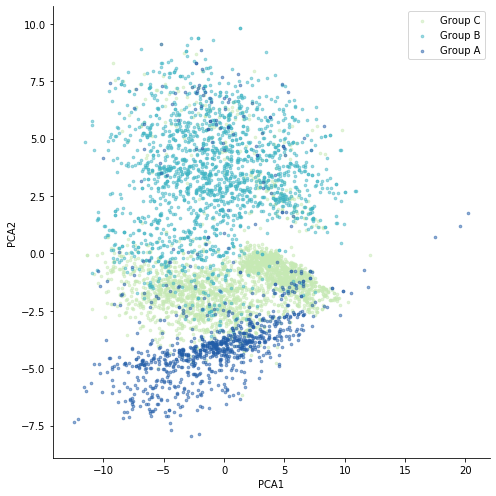

In [54]:
# visualizing clusters with 2 pca components
import seaborn as sns

# Use the 'hue' argument to provide a factor variable
sns.lmplot(x="PCA1", y="PCA2", data=datamart, fit_reg=False, hue='group', legend=False, height=7, palette='YlGnBu', scatter_kws={'alpha':.5, 's': 7})
 
# Move the legend to an empty part of the plot
plt.legend(loc='upper right')
 
plt.show()

In [55]:
# saving datamart and cluster characteristics
datamart.groupby("cluster_kmodes").mean().to_csv("./bank_clusters_kmodes.csv")
datamart.to_csv("./bank_mart_kmodes.csv")